<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Regression Model | Birthweight</h2>

Sneha Ramu - MBAN


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Data Preparation</h2><br>
<h3>Import library and Read the file</h3><br>

In [4]:
# import libraries
import numpy as np                                         # mathematical essentials
import matplotlib.pyplot as plt                            # essential graphical output
import pandas as pd                                        # data science essentials
import seaborn as sns                                      # enhanced graphical essentials
import sklearn.linear_model                                # linear model                               
import statsmodels.formula.api as smf                      # regression modelling

from sklearn.linear_model    import LinearRegression       # linear regression (scikit-learn)
from sklearn.model_selection import train_test_split       # train_test split
from sklearn.neighbors       import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing   import StandardScaler         # standard scalar

a) Print first five rows of the data

In [5]:
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './birthweight_low.xlsx'

# reading the file inot Python
birthweight = pd.read_excel(io = file)

# produce result of first 5 columns
birthweight.head(5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


b) Obtain the shape of the data set

In [6]:
# using .shape to view rows and columns
birthweight.shape

# printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



<h3>Replace Missing Values</h3><br>
a) Check for missing values in the data

In [7]:
# using .isnull() to find columns with missing values
print(birthweight.isnull().any())

# printing total number of missing values
print(f"Total number of missing values: {birthweight.isnull().sum(axis = 0).sum()}")

mage      False
meduc      True
monpre    False
npvis      True
fage      False
feduc      True
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool
Total number of missing values: 13


b) Find the mode of rows which consists of missing values

In [8]:
# to find the mode of the columns with missing values
birthweight_mode = birthweight[['meduc', 'npvis', 'feduc']].mode()
birthweight_mode

,meduc,npvis,feduc
0,12.0,12.0,12.0


c) Replace the missing values with respective mode values

In [9]:
# assigning the mode value
bw_mode = 12.0

# to fill in the missing values with mode
birthweight['meduc'] = birthweight['meduc'].fillna(bw_mode)
birthweight['npvis'] = birthweight['npvis'].fillna(bw_mode)
birthweight['feduc'] = birthweight['feduc'].fillna(bw_mode)

d) Re-check for missing values 

In [10]:
# to check if missing values have been replaceds
birthweight.isnull().any()

mage      False
meduc     False
monpre    False
npvis     False
fage      False
feduc     False
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool

e) Categorize variables based on 'continuous' and 'countable' characteristics

In [11]:
"""CONTINUOUS\
----------

bwght\
mage\
meduc\
monpre\
npvis\
fage\
feduc\
cigs\
drink\

#INTERVAL/COUNT\
--------------

male\
mwhte\
mblck\
moth\
fwhte\
fblck\
foth\
omaps\
fmaps\
"""

'CONTINUOUS----------\n\nbwghtmagemeducmonprenpvisfagefeduccigsdrink\n#INTERVAL/COUNT--------------\n\nmalemwhtemblckmothfwhtefblckfothomapsfmaps'

<h2>Develop Regression Model</h2><br>
<h3>Regression Model with 'continuous' variables only</h3><br>

In [12]:
# running regression with continuous varibales
lm_best = smf.ols(formula = """bwght ~ fmaps  + mage + cigs + drink + fage """,
                 data = birthweight)

results = lm_best.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     95.08
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           8.42e-50
Time:                        18:48:01   Log-Likelihood:                -1423.3
No. Observations:                 196   AIC:                             2859.
Df Residuals:                     190   BIC:                             2878.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4226.7312    406.125     10.407      0.0

<h3>Scatter Plots</h3><br>
Run scatter plots to understand the relation between the 'continuous' variables

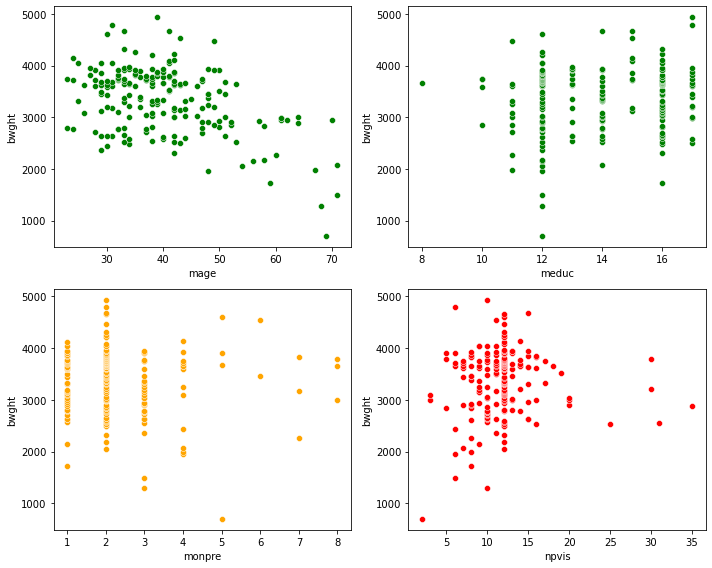

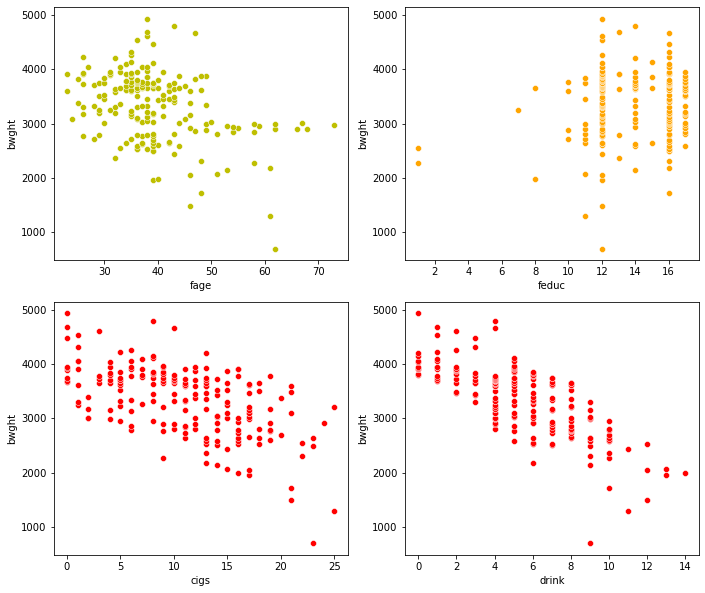

In [13]:
# set the size  
fig, ax = plt.subplots(figsize = (10, 8))

# "mother's age"
plt.subplot(2, 2, 1)
sns.scatterplot(x = birthweight['mage'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels only
plt.xlabel(xlabel = 'mage')
plt.ylabel(ylabel = 'bwght')

################################################

# "mother's education"
plt.subplot(2, 2, 2)
sns.scatterplot(x = birthweight['meduc'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels only
plt.xlabel(xlabel = 'meduc')
plt.ylabel(ylabel = 'bwght')

################################################

# "month prenatal care began"
plt.subplot(2, 2, 3)
sns.scatterplot(x = birthweight['monpre'],
                y = birthweight['bwght'],
                color = 'orange')


# adding labels only
plt.xlabel(xlabel = 'monpre')
plt.ylabel(ylabel = 'bwght')

################################################

# "numbers of prenatal visits"
plt.subplot(2, 2, 4)
sns.scatterplot(x = birthweight['npvis'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels only
plt.xlabel(xlabel = 'npvis')
plt.ylabel(ylabel = 'bwght')


# print
plt.tight_layout()
plt.show()

################################################

# set the size 
fig, ax = plt.subplots(figsize = (10, 12))


# "father's age"
plt.subplot(3, 2, 1)
sns.scatterplot(x = birthweight['fage'],
                y = birthweight['bwght'],
                color = 'y')


# adding labels only
plt.xlabel(xlabel = 'fage')
plt.ylabel(ylabel = 'bwght')

################################################

# "father's education"
plt.subplot(3, 2, 2)
sns.scatterplot(x = birthweight['feduc'],
                y = birthweight['bwght'],
                color = 'orange')


# adding labels only
plt.xlabel(xlabel = 'feduc')
plt.ylabel(ylabel = 'bwght')

################################################

# "average cigarettes per day"
plt.subplot(3, 2, 3)
sns.scatterplot(x = birthweight['cigs'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels only
plt.xlabel(xlabel = 'cigs')
plt.ylabel(ylabel = 'bwght')

################################################

# "average drinks per week"
plt.subplot(3, 2, 4)
sns.scatterplot(x = birthweight['drink'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels only
plt.xlabel(xlabel = 'drink')
plt.ylabel(ylabel = 'bwght')


# print
plt.tight_layout()
plt.show()

<h3>Train- Test Split</h3><br>
Split the data into training data set and testing data set

In [14]:
# preparing explanatory variable data
birthweight_data = birthweight.drop(["bwght"],
                                   axis = 1)
birthweight_target = birthweight.loc[: , 'bwght']

# preparing training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)

# checking the shapes of the data sets
print(f"""
Training Data
-------------
X-side : {x_train.shape}
y-side : {y_train.shape}

Testing Data
------------
x-side : {x_test.shape}
y-side : {y_test.shape}
""")


Training Data
-------------
X-side : (147, 17)
y-side : (147,)

Testing Data
------------
x-side : (49, 17)
y-side : (49,)



Create the list of variables to be used for regression

In [15]:
# creating list for running different models
x_variables_mod = ['mage', 'cigs', 'drink', 'fage']

<h3>OLS Model</h3>
Train- test split for OLS model

In [16]:
# applying modeline scikit- learn 

# preparing x-varibales from the OLS model
ols_data = birthweight.loc[:, x_variables_mod]

# preparing response variable
ols_target = birthweight.loc[:, 'bwght']

# setting more than one train- test split

# full x-dataset 
x_train_Full, x_test_Full, y_train_Full, y_test_Full = train_test_split(
              birthweight_data,
              birthweight_target,
              test_size = 0.25,
              random_state = 219)

# OLS value dataset
x_train_ols, x_test_ols, y_train_ols, y_test_ols = train_test_split(
              ols_data,
              ols_target,
              test_size = 0.25,
              random_state = 219)


In [23]:
# merging x_train and y_train so that they can be used in statsmodel
birthweight_train = pd.concat([x_train, y_train], axis = 1)

lm_best = smf.ols(formula = """ bwght ~  mage + cigs + drink + fage  """,
                 data = birthweight_train)

# fit the data into the model object
results = lm_best.fit()

# print the summary of results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     88.84
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           1.15e-37
Time:                        18:54:13   Log-Likelihood:                -1072.5
No. Observations:                 147   AIC:                             2155.
Df Residuals:                     142   BIC:                             2170.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5149.6763    144.065     35.745      0.0

In [24]:
# instantiating a model object
lr = LinearRegression()

# fitting to the training data
lr_fit = lr.fit(x_train_ols, y_train_ols)

#predicting on new data
lr_pred = lr_fit.predict(x_test_ols)

# scoring the results
print('OLS Training Score :', lr.score(x_train_ols, y_train_ols).round(4))
print('OLS Testing Score :', lr.score(x_test_ols, y_test_ols).round(4))

# scorinf the results
lr_train_score = lr.score(x_train_ols, y_train_ols).round(4)
lr_test_score = lr.score(x_test_ols, y_test_ols).round(4)

# displaying and saving the gap between training and testing score
print('OLS Train_Test Gap:', abs(lr_train_score -lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7145
OLS Testing Score : 0.654
OLS Train_Test Gap: 0.0605


In [20]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthweight_data[x_variables_mod].columns,
                     lr_fit.coef_.round(2))

# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(2))]

# printing out each feature_coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    
# printing the results
for pair in lr_model_lst:
    print(pair)

('intercept', 5149.68)
('mage', -15.87)
('cigs', -37.49)
('drink', -108.71)
('fage', -4.1)


<h3>Lasso Model</h3>

In [25]:
# instantiating a lasso model
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize =True)

# fitting the training model
lasso_fit = lasso_model.fit(x_train_ols, y_train_ols)

# predicting on new data
lasso_pred = lasso_fit.predict(x_test_ols)

# scoring the results
print('Lasso Training Score :', lasso_model.score(x_train_ols, y_train_ols).round(4))
print('Lasso Testing Score :', lasso_model.score(x_test_ols, y_test_ols).round(4))


lasso_train_score = lasso_model.score(x_train_ols, y_train_ols).round(4)
lasso_test_score = lasso_model.score(x_test_ols, y_test_ols).round(4)

# displaying and saving the gap between training and testing score
print('Lasso Train_Test Gap:', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)


Lasso Training Score : 0.7138
Lasso Testing Score : 0.6597
Lasso Train_Test Gap: 0.0541


In [26]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthweight.columns,
                     lasso_fit.coef_.round(2))

# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(2))]

# printing out each feature_coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    
# printing the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 5079.79)
('mage', -15.34)
('meduc', -36.25)
('monpre', -106.8)
('npvis', -3.48)


<h3>ARD Model</h3>

In [28]:
# instantiating a ARD model
ard_model = sklearn.linear_model.ARDRegression()

# fitting the training model
ard_fit = ard_model.fit(x_train_ols, y_train_ols)

# predicting on new data
ard_pred = ard_fit.predict(x_test_ols)

# scoring the results
print('ARD Training Score :', ard_model.score(x_train_ols, y_train_ols).round(4))
print('ARD Testing Score :', ard_model.score(x_test_ols, y_test_ols).round(4))

# scorinf the results
ard_train_score = ard_model.score(x_train_ols, y_train_ols).round(4)
ard_test_score = ard_model.score(x_test_ols, y_test_ols).round(4)

# displaying and saving the gap between training and testing score
print('ARD Train_Test Gap:', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

ARD Training Score : 0.7133
ARD Testing Score : 0.6512
ARD Train_Test Gap: 0.0621


In [29]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight.columns,
                     ard_fit.coef_.round(2))

# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(2))]

# printing out each feature_coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    
# printing the results
for pair in ard_model_lst:
    print(pair)

('intercept', 5072.57)
('mage', -16.94)
('meduc', -37.49)
('monpre', -109.09)
('npvis', -0.99)


In [30]:
# dropping co-efficients equal to 0
# printing out each feature-coefficient oair one by one
for feature, coefficient in ard_model_lst:
    if coefficient == 0:
        ard_model_lst.remove((feature, coefficient))

# printing results
for pair in ard_model_lst:
    print(pair)

('intercept', 5072.57)
('mage', -16.94)
('meduc', -37.49)
('monpre', -109.09)
('npvis', -0.99)


Converting into DataFrame

In [31]:
# instantiating a standard scaler object
scaler = StandardScaler()

# fitting the scalar with birthweight data
scaler.fit(birthweight_data)

# transforming our data after fit
x_scaled = scaler.transform(birthweight_data)

# converting scaled data into a Data Frame
x_scaled_df = pd.DataFrame(x_scaled)

# printing the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.68,-2.87,-0.99,-2.27,-1.82,-4.91,-3.94,-6.10,-1.80,-1.80,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67
25%,-0.70,-0.92,-0.25,-0.38,-0.51,-0.68,-0.12,0.05,-0.81,-0.47,-1.11,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67
50%,-0.11,0.06,-0.25,0.09,-0.14,0.08,0.51,0.05,0.01,-0.13,0.90,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67
75%,0.57,1.03,0.49,0.09,0.41,0.85,0.51,0.05,0.71,0.62,0.90,1.64,1.27,1.37,1.37,1.39,1.49
max,3.02,1.52,4.19,5.54,3.76,1.24,1.15,1.59,2.31,2.87,0.90,1.64,1.27,1.37,1.37,1.39,1.49


In [32]:
# adding labels to the scaled DataFrames
x_scaled_df.columns = birthweight_data.columns

# checking pre and posr scaling of the data
print(f"""
Dataset Before Scaling
----------------------
{np.var(birthweight_data)}

Dataset After Scaling
---------------------
{np.var(x_scaled_df)}
""")


Dataset Before Scaling
----------------------
mage      104.527593
meduc       4.195413
monpre      1.827025
npvis      17.840561
fage       80.277671
feduc       6.773298
omaps       2.472616
fmaps       0.422194
cigs       37.035714
drink       8.964077
male        0.247397
mwhte       0.197288
mblck       0.236230
moth        0.226572
fwhte       0.226572
fblck       0.224984
foth        0.214364
dtype: float64

Dataset After Scaling
---------------------
mage      1.0
meduc     1.0
monpre    1.0
npvis     1.0
fage      1.0
feduc     1.0
omaps     1.0
fmaps     1.0
cigs      1.0
drink     1.0
male      1.0
mwhte     1.0
mblck     1.0
moth      1.0
fwhte     1.0
fblck     1.0
foth      1.0
dtype: float64



<h3>KNN Model</h3>
Split the data for training and testing

In [33]:

x_train, x_test, y_train, y_test = train_test_split(
                 birthweight_data,
                 birthweight_target,
                 test_size    = 0.25,
                 random_state = 219)

In [34]:
# instantiating a KNN model
knn_reg =KNeighborsRegressor(algorithm = 'auto',
                            n_neighbors = 1)

# fitting to the training data
knn_fit = knn_reg.fit(x_train, y_train)

# predicting on new data
knn_reg_pred = knn_fit.predict(x_test)

# scoring the results
print('KNN Training Score :', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :', knn_reg.score(x_test, y_test).round(4))

# scorinf the results
knn_train_score = knn_reg.score(x_train, y_train).round(4)
knn_test_score =  knn_reg.score(x_test, y_test).round(4)

# displaying and saving the gap between training and testing score
print('KNN Train_Test Gap:', abs(knn_train_score - knn_test_score).round(4))
knn_test_gap = abs(knn_train_score - knn_test_score).round(4)

KNN Training Score : 1.0
KNN Testing Score : 0.3562
KNN Train_Test Gap: 0.6438


In [35]:
# result table
print(f"""
Model            Train Score    Test Score     Train-Test Gap
-----            -----------    ----------     --------------
ARD              {ard_train_score}          {ard_test_score}            {ard_test_gap}
Lasso*           {lasso_train_score}         {lasso_test_score}            {lasso_test_gap}
OLS              {lr_train_score}         {lr_test_score}            {lr_test_gap}
""")
""" * Lasso is the final model used  """


Model            Train Score    Test Score     Train-Test Gap
-----            -----------    ----------     --------------
ARD              0.7133          0.6512            0.0621
Lasso*           0.7138         0.6597            0.0541
OLS              0.7145         0.654            0.0605



' * Lasso is the final model used  '